In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import math
import random
import functions
import LNL_model_modified
import matplotlib.pyplot as plt
from RBF import RBF
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 16, 8

# Pre processing

In [2]:
df = pd.read_csv('beer.csv')
data = df.iloc[:, -1].values

ent = 8

serie_normal = functions.normalizar_serie(data)
serie_lags = functions.gerar_janelas(tam_janela = ent, serie = serie_normal)
X_train, y_train, X_test, y_test, X_val, y_val = functions.split_serie_with_lags(serie = serie_lags, perc_train = 0.7, perc_val = 0.15)

Particao de Treinamento: 0 100
Particao de Validacao: 100 121
Particao de Teste: 121 144


# Gridsearch for best model

In [7]:
# MPSO Parameters
C1 = [2.0, 4.0, 6.0, 8.0]
C2 = [2.0, 4.0, 6.0, 8.0]
W = [0.5, 0.7, 0.9]
epochs = 8000
n_particles = 50

-----------------------------------------------------------------------
Validation MSE = 0.06414185046413434 Particle: [-0.10583364  0.82052742 -0.50948867 -0.06803958  1.69712537  0.51749181
  1.55279099 -3.07056481  1.04421468 -0.51854485 -0.44327261  1.3135103
  0.64331493 -0.29319662  1.99096067 -0.03460582 -1.98976092 -0.17017409
  1.76294309 -0.53560027  0.55617503  1.75672881  1.28587844  2.11638882
  1.34736878 -0.97987139  0.76215021  1.88278163  0.6933498   1.22995617
  1.14228015 -0.15258739  0.89043442  0.89998605 -0.56396951  0.71360097
 -0.63746978  0.60449161 -1.02939161  1.60399794 -0.00738701]


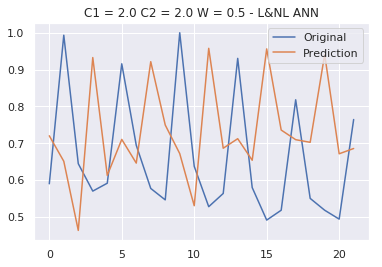

Test MSE = 0.06319101185331653


/home/CIN/jvcm/time-series/hybrid_system/functions.py:96: RuntimeWarning: overflow encountered in exp
  sigm = 1. / (1. + np.exp(-x))


-----------------------------------------------------------------------
Validation MSE = 0.0201031985962609 Particle: [ 6.36041307e-02  1.84524609e+00  4.32961129e-01 -7.16303218e-01
  1.56437844e+00  6.77263011e-01  3.43165975e-01  1.18608589e-01
  9.06165867e-02 -8.87203648e-01 -5.73852670e-02  8.84186844e-01
 -2.97201843e-01  1.88501721e+00 -1.69094878e-01  2.07730459e+00
  5.70058709e-01  6.48356803e-01  9.02219260e-01  5.54018054e-01
  2.17824271e+00  5.67535471e-01  1.89053096e+00  2.75830770e-01
  6.69717148e-01 -6.71875260e-01  2.09100490e+00  8.03618677e-02
  1.83893134e+00 -8.69866685e-04  3.52651038e-01 -4.92028920e-01
  8.14218827e-01 -5.70201151e-02  1.80879687e+00  4.54977345e-01
  4.11950119e-02  1.73198287e-01 -1.05454427e+00  2.98479806e-01
 -6.54992801e-02]


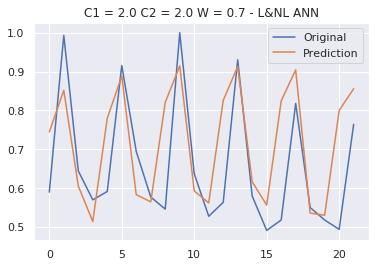

Test MSE = 0.020999947481673505


/home/CIN/jvcm/tsenv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/CIN/jvcm/time-series/hybrid_system/LNL_model_modified.py:41: RuntimeWarning: overflow encountered in double_scalars
  net3 = w3[0]*f1 + w3[1]*f2 + b3


-----------------------------------------------------------------------
Validation MSE = 0.014241573788405303 Particle: [ 6.00074557 -0.50155353  1.08401815 -1.21493307 -0.06901811  0.44452377
 -0.61457942 -0.51275491 -0.92158331  0.65769361  3.64467825  2.02636431
  2.83868827  0.30040782  1.250998    2.26272621 -0.02169987  1.93676699
  4.23662569 -1.84037686  6.29846074  6.14842793  5.95492148  0.56017176
 -0.73914999 -1.50244088 -1.7528969  -0.5445888  -0.87608988  1.71426946
  2.72933005  0.57229519 -1.87720588  0.78027547 -1.83061047 -0.08337836
 -0.30087694  3.11066885 -0.52840302 -1.20298498  1.07281349]


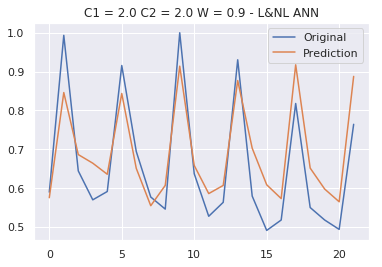

Test MSE = 0.006391778854554775
-----------------------------------------------------------------------
Validation MSE = 0.011324466245428277 Particle: [-3.54178005 -1.76176996  2.52725544 -0.62108779 -0.95848651 -2.46543807
 -0.87437298  1.72661684  0.14960926 -0.55318729 -2.07001842  2.00535092
  4.35984634 -0.04332648  1.64604038  0.73419105 -2.13073333 -0.26708745
  0.86052034 -3.98399555  3.67779325  0.06819794  0.6452905  -1.14695532
 -1.5577492   0.49591738 -1.98657699  0.20962323 -0.02426027  3.76120949
 -2.15395387  0.75726107  0.12134197  5.00848879  0.76408382 -1.51783126
  0.85215755  0.72668347 -1.43174223 -0.10090525 -3.76819857]


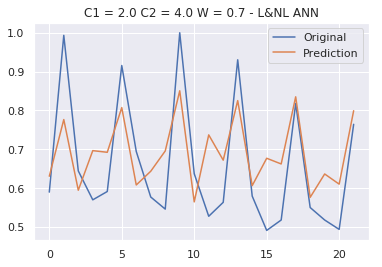

Test MSE = 0.013787650834045095


In [ ]:
#Gridsearch
best_mse = np.Inf
for i, c1 in enumerate(C1):
    for j, c2 in enumerate(C2):
        for k, w in enumerate(W):
            model = LNL_model_modified.LNL_ANN(m = ent, z = 2)
            model.fit_MPSO(X_train, y_train, d= n_particles,
                           c1i = c1, c1f = 1.0, c2i = c2, c2f = 1.0,
                           w1 = 0.1, w2 = w, maxt = epochs)
            val_pred = model.predict(X_val)
            mse = functions.mean_squared_error(y_val, val_pred)
            if mse < best_mse:
                print('-----------------------------------------------------------------------')
                best_mse = mse
                best_model = model
                print('Validation MSE =', best_mse, 'Particle:', best_model.weight)
                best_params = [c1, c2, w]
                
                # Setting last portion of validation data to predict
                model.setFinalData(X_val)
                
                # Ready to predict...
                y_pred = best_model.predict(X_test)
                
                # Plot
                plt.plot(y_test, label = 'Original')
                plt.plot(y_pred, label = 'Prediction')
                plt.title('C1 = {} C2 = {} W = {} - L&NL ANN' .format(c1, c2, w))
                plt.legend()
                plt.show()
                print('Test MSE =', functions.mean_squared_error(y_test, y_pred))

In [ ]:
best_particle_so_far = np.array([-0.92858087,  0.72934543, -0.02192787, -0.30216141, -2.3875051,  -0.66749141,
 -0.57694882,  0.62552758  ,2.67747531,  0.09036076,  1.96569626, -1.15446164,
  0.45834524,  0.02251597 , 0.01411925 , 0.9391682 , -1.235577  , -0.71884688,
  2.44802591 ,-0.11074839 ,-0.44970263 , 0.52087   ,  0.79258018,  0.60025631,
 -0.17606552  ,1.86612488 ,-0.73348743 , 0.45520516, -0.03206574,  0.03680129,
  0.20174614  ,0.03110157 ,-3.12018074 , 0.5231808 , -0.05375093, -2.05032889,
 -0.2881787   ,0.02517926, -0.78981505 ,-2.810758  , -0.10715446])

In [5]:
Best_1 = best_model